Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)


Data


In [23]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize Examples

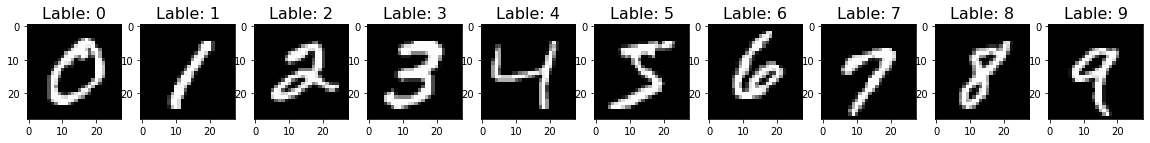

In [25]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Lable: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Preparing Data

In [ ]:
#normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Creating a Fully Connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train



In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 15ms/step - loss: 0.6084 - accuracy: 0.8238
Epoch 2/10
118/118 [==============================] - 2s 21ms/step - loss: 0.2190 - accuracy: 0.9368
Epoch 3/10
118/118 [==============================] - 3s 22ms/step - loss: 0.1643 - accuracy: 0.9523
Epoch 4/10
118/118 [==============================] - 2s 17ms/step - loss: 0.1260 - accuracy: 0.9634
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1045 - accuracy: 0.9687
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0891 - accuracy: 0.9735
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0761 - accuracy: 0.9769
Epoch 8/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 9/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 10/10
118/118 [==============================] - 2s 19ms/step - loss: 0.0491 - accura

#Evaluate


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9780
Test Loss: 0.072649747133255, Test Accuracy: 0.9779999852180481


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[8.6019276e-07 6.5010067e-07 1.3964818e-05 ... 9.9977398e-01
  9.0076963e-07 1.0644913e-04]
 [4.4113952e-09 1.6449429e-05 9.9997503e-01 ... 2.0084387e-10
  4.9115079e-06 2.0067747e-12]
 [3.7444333e-06 9.9712116e-01 2.2968223e-04 ... 1.5617826e-03
  5.4004160e-04 8.4964640e-06]
 ...
 [1.3993423e-10 5.2261737e-09 2.0353710e-10 ... 1.1929160e-07
  1.2097954e-07 9.8533965e-06]
 [2.5635558e-08 1.4338579e-09 6.6208798e-09 ... 5.7054002e-09
  2.7084079e-05 1.2616087e-09]
 [5.1219646e-09 3.9563246e-09 1.3142161e-08 ... 2.3219622e-11
  1.4220821e-09 5.3880671e-11]]
[7 2 1 ... 4 5 6]


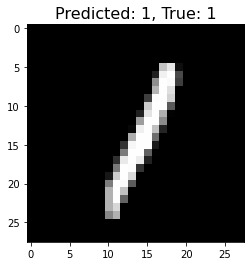

In [ ]:
#single example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

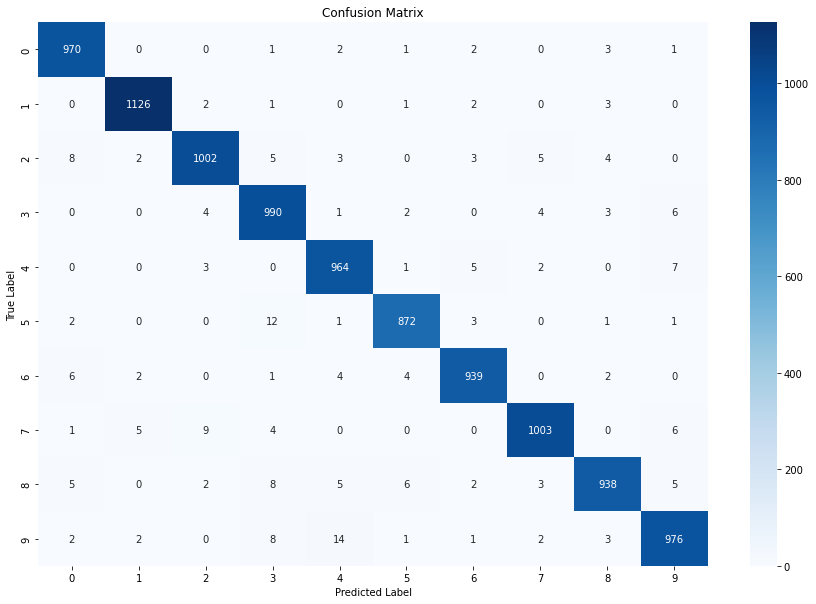

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');
